# Book Recommendation System

# Table of Contents

1. [Obtain](#1-Obtain-:-Web-Scraping-from-Google-Books)
2. [Scrub](#2-Scrub-:-Data-Cleaning)
3. [Explore](#3-Explore-:-Exploratory-Data-Analysis)

# 1 Obtain : Web Scraping from Google Books

In [1]:
import requests
import pandas as pd

# Book Genre Keywords
genre_list = ['invest', 'memoirs', 'art', 'entertainment', 'business', 'biography', 'children', 'comics', 'computers', \
              'technology', 'cooking', 'food', 'wine', 'education', 'fiction', 'literature', 'language', 'health', \
              'psychology', 'history', 'parenting', 'families', 'romance', 'science', 'travel', 'self-help', 'sports', \
              'young adult', 'science fiction', 'action', 'adventure', 'fantasy', 'mystery', 'horror', 'thriller', \
              'contemporary', 'literary', 'short story', 'crime', 'humor', 'guide', 'religion', 'mathematics', 'biology', \
              'physics', 'aerology', 'magic', 'dystopian', 'classic', 'tragedy', 'fairy tale', 'satire', 'biography', \
              'narrative', 'encyclopedia', 'politics', 'poetry', 'social science', 'detective', 'creative', 'spiritual',\
              'prose', 'autobiography', 'graphic', 'paranormal romance', 'home and garden', 'economics', 'finance', \
              'diary', 'leisure', 'suspense', 'drama', 'culture', 'short story', 'music', 'review', 'philosophy', \
              'fitness', 'dictionary', 'LGBTQ+', 'utopian', 'western', 'photography', 'DIY', 'how-to', 'motivational', \
              'craft', 'relationship', 'law', 'criminology', 'opera', 'film', 'wedding', 'dance', 'comedy', 'programming',\
              'automotive', 'manga', 'revolution', 'chick lit', 'architecture', 'alternate history', 'anthology', \
              'hobbies', 'culinary', 'realism', 'dark fantasy', 'mythology', 'body horror', 'gothic', 'paranormal', \
              'saga', 'epic', 'urban', 'heroic', 'noir', 'supernatural', 'police', 'medical', 'time travel', \
              'apocalypse', 'colonization', 'colony', 'biblical', 'military', 'steampunk', 'space', 'exploration', \
              'nature', 'plants', 'animals', 'alternate dimension', 'parallel world', 'conspiracy', 'forensic', \
              'espionage', 'eastern', 'women', 'POC', 'true crime', 'ghost', 'legend', 'pirate', 'parody', 'pop culture', \
              'self-insert', 'spy', 'superhero', 'survival', 'city', 'occult', 'zombie', 'feminist', 'mecha', 'academic', \
              'data-driven', 'environmental', 'fashion', 'trade', 'world', 'video games', 'global', 'gossip', 'monster', \
              'alien']

# Book Dict to store books based on genre
book_dict = {}

# Use loop to find books from each genre in genre list and put in dataframe
for genre in genre_list:
    # loop through index with increment by 40 (max fetch is 40 each time) until 2000
    for idx in range(0, 1000, 40):
        api_url = 'https://www.googleapis.com/books/v1/volumes?q='+genre+'+book&printType=books&langRestrict=en&startIndex='+str(idx)+'&maxResults=40'
        response = requests.get(api_url)
        # retrieve data only if the response is success
        if response.status_code == 200:
            data = response.json()
            # check if the book information is in the json file (may not have the info sometimes)
            # only put data into list if there is info
            if 'items' in data:
                # assign item list if the genre key is not in the book_dict, otherwise extend it
                if genre not in book_dict:
                    # book_dict[genre] = pd.DataFrame.from_dict(pd.json_normalize(data['items']), orient='columns')
                    book_dict[genre] = data['items']
                else:
                    # book_dict[genre] = book_dict[genre].append(pd.json_normalize(data['items']), ignore_index=True)
                    book_dict[genre].extend(data['items'])
        else:
            print("Request Error for", genre, ":", response.status_code)

In [2]:
# check the books count for each genre
for book, ls in book_dict.items():
    print("Books count for", book,": ",len(ls))

Books count for invest :  662
Books count for memoirs :  701
Books count for art :  663
Books count for entertainment :  746
Books count for business :  651
Books count for biography :  1338
Books count for children :  618
Books count for comics :  682
Books count for computers :  703
Books count for technology :  684
Books count for cooking :  681
Books count for food :  692
Books count for wine :  645
Books count for education :  658
Books count for fiction :  603
Books count for literature :  646
Books count for language :  746
Books count for health :  670
Books count for psychology :  661
Books count for history :  663
Books count for parenting :  653
Books count for families :  716
Books count for romance :  743
Books count for science :  649
Books count for travel :  683
Books count for self-help :  649
Books count for sports :  715
Books count for young adult :  659
Books count for science fiction :  662
Books count for action :  736
Books count for adventure :  701
Books count

In [3]:
# cross-check if the list is correct and as expected
for book, ls in book_dict.items():
    if book == 'art':
        print(*ls, sep = "\n")

{'kind': 'books#volume', 'id': 'bltTPgAACAAJ', 'etag': 'sRoK56zFBbQ', 'selfLink': 'https://www.googleapis.com/books/v1/volumes/bltTPgAACAAJ', 'volumeInfo': {'title': 'The Art Book', 'authors': ['Editors of Phaidon Press'], 'publisher': 'Phaidon Press', 'publishedDate': '2005-03-02', 'description': "Depicts five hundred paintings and sculptures from the Middle Ages to the present, each by a different artist, in alphabetical order by artist, with a brief description of the work and its place in art history and in the artist's career.", 'industryIdentifiers': [{'type': 'ISBN_10', 'identifier': '071484487X'}, {'type': 'ISBN_13', 'identifier': '9780714844879'}], 'readingModes': {'text': False, 'image': False}, 'pageCount': 512, 'printType': 'BOOK', 'categories': ['Art'], 'averageRating': 4, 'ratingsCount': 9, 'maturityRating': 'NOT_MATURE', 'allowAnonLogging': False, 'contentVersion': 'preview-1.0.0', 'imageLinks': {'smallThumbnail': 'http://books.google.com/books/content?id=bltTPgAACAAJ&pr

In [4]:
# Put all books into a master list, then convert into dataframe
# create an empty list
book_list = []

# put all books in book_list
for ls in book_dict.values():
    book_list.extend(ls)

# convert book master list into dataframe
book_df = pd.DataFrame.from_dict(pd.json_normalize(book_list), orient='columns')
display(book_df)

# put in csv file
book_df.to_csv('books.csv')

,kind,id,etag,selfLink,volumeInfo.title,volumeInfo.subtitle,volumeInfo.authors,volumeInfo.publisher,volumeInfo.publishedDate,volumeInfo.description,...,volumeInfo.ratingsCount,accessInfo.epub.downloadLink,accessInfo.pdf.downloadLink,volumeInfo.panelizationSummary.imageBubbleVersion,volumeInfo.comicsContent,volumeInfo.seriesInfo.kind,volumeInfo.seriesInfo.bookDisplayNumber,volumeInfo.seriesInfo.volumeSeries,volumeInfo.panelizationSummary.epubBubbleVersion,volumeInfo.seriesInfo.shortSeriesBookTitle
0,books#volume,eIJiDwAAQBAJ,1xcHQ4mb0QM,https://www.googleapis.com/books/v1/volumes/eI...,Invest Outside the Box,Understanding Different Asset Classes and Stra...,[Tariq Dennison],Springer,2018-06-28,This book is a practical and concise guide to ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,books#volume,UacEEAAAQBAJ,pQzVcEsJ4kI,https://www.googleapis.com/books/v1/volumes/Ua...,How I Invest My Money,"Finance experts reveal how they save, spend, a...","[Brian Portnoy, Joshua Brown]",Harriman House Limited,2020-11-17,The world of investing normally sees experts t...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,books#volume,pNI4DwAAQBAJ,2V7L2ChAUb4,https://www.googleapis.com/books/v1/volumes/pN...,Value Investing in Asia,The Definitive Guide to Investing in Asia,"[Peir Shenq (Stanley) Lim, Mun Hong Cheong]",John Wiley & Sons,2017-10-06,"A practical, step-by-step guide to value inves...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,books#volume,DBeCEAAAQBAJ,GzHy/Dvmvl0,https://www.googleapis.com/books/v1/volumes/DB...,How to Invest,Masters on the Craft,[David M. Rubenstein],Simon and Schuster,2022-09-13,"""What do the most successful investors have in...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,books#volume,5qCaDwAAQBAJ,7xVJ4bf3Hfc,https://www.googleapis.com/books/v1/volumes/5q...,Simply Invest,Naked Truths to Grow Your Money,[Goh Yang Chye],Epigram Books,2019,"A pioneer in financial planning in Singapore, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112828,books#volume,6VJVzQEACAAJ,QSd3SJ2ZDRk,https://www.googleapis.com/books/v1/volumes/6V...,Jelly Roll,NaN,[Mere Joyce],Orca Currents,2020-08-18,In this high-interest novel for middle readers...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112829,books#volume,o2SGzQEACAAJ,V63mueCDdng,https://www.googleapis.com/books/v1/volumes/o2...,AVP,Alien Vs. Predator : Novelization,[Marc Cerasini],NaN,2004,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112830,books#volume,yvN2swEACAAJ,+xsRECtvDuI,https://www.googleapis.com/books/v1/volumes/yv...,The Puppet Masters,NaN,[Robert Anson Heinlein],Macmillan Reference USA,1979,Earth was being invaded by aliens and the top ...,...,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112831,books#volume,LdJnvgEACAAJ,xCWmXO/RtbU,https://www.googleapis.com/books/v1/volumes/Ld...,Missing Time,A Documented Study of UFO Abductions,[Budd Hopkins],Berkley,1983,The arrival of extraterrestrial visitors is on...,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2 Scrub : Data Cleaning

## Data Understanding

In [40]:
import pandas as pd

# read data from the saved CSV file
book_df = pd.read_csv('books.csv')

In [41]:
# Check the rows and columns of the dataframe
print("Number of rows and columns: ", book_df.shape)

Number of rows and columns:  (112833, 61)


In [42]:
# Display dataframe
display(book_df)

,Unnamed: 0,kind,id,etag,selfLink,volumeInfo.title,volumeInfo.subtitle,volumeInfo.authors,volumeInfo.publisher,volumeInfo.publishedDate,...,volumeInfo.ratingsCount,accessInfo.epub.downloadLink,accessInfo.pdf.downloadLink,volumeInfo.panelizationSummary.imageBubbleVersion,volumeInfo.comicsContent,volumeInfo.seriesInfo.kind,volumeInfo.seriesInfo.bookDisplayNumber,volumeInfo.seriesInfo.volumeSeries,volumeInfo.panelizationSummary.epubBubbleVersion,volumeInfo.seriesInfo.shortSeriesBookTitle
0,0,books#volume,eIJiDwAAQBAJ,1xcHQ4mb0QM,https://www.googleapis.com/books/v1/volumes/eI...,Invest Outside the Box,Understanding Different Asset Classes and Stra...,['Tariq Dennison'],Springer,2018-06-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,books#volume,UacEEAAAQBAJ,pQzVcEsJ4kI,https://www.googleapis.com/books/v1/volumes/Ua...,How I Invest My Money,"Finance experts reveal how they save, spend, a...","['Brian Portnoy', 'Joshua Brown']",Harriman House Limited,2020-11-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,books#volume,pNI4DwAAQBAJ,2V7L2ChAUb4,https://www.googleapis.com/books/v1/volumes/pN...,Value Investing in Asia,The Definitive Guide to Investing in Asia,"['Peir Shenq (Stanley) Lim', 'Mun Hong Cheong']",John Wiley & Sons,2017-10-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,books#volume,DBeCEAAAQBAJ,GzHy/Dvmvl0,https://www.googleapis.com/books/v1/volumes/DB...,How to Invest,Masters on the Craft,['David M. Rubenstein'],Simon and Schuster,2022-09-13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,books#volume,5qCaDwAAQBAJ,7xVJ4bf3Hfc,https://www.googleapis.com/books/v1/volumes/5q...,Simply Invest,Naked Truths to Grow Your Money,['Goh Yang Chye'],Epigram Books,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112828,112828,books#volume,6VJVzQEACAAJ,QSd3SJ2ZDRk,https://www.googleapis.com/books/v1/volumes/6V...,Jelly Roll,NaN,['Mere Joyce'],Orca Currents,2020-08-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112829,112829,books#volume,o2SGzQEACAAJ,V63mueCDdng,https://www.googleapis.com/books/v1/volumes/o2...,AVP,Alien Vs. Predator : Novelization,['Marc Cerasini'],NaN,2004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112830,112830,books#volume,yvN2swEACAAJ,+xsRECtvDuI,https://www.googleapis.com/books/v1/volumes/yv...,The Puppet Masters,NaN,['Robert Anson Heinlein'],Macmillan Reference USA,1979,...,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112831,112831,books#volume,LdJnvgEACAAJ,xCWmXO/RtbU,https://www.googleapis.com/books/v1/volumes/Ld...,Missing Time,A Documented Study of UFO Abductions,['Budd Hopkins'],Berkley,1983,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# drop the Unnamed column
book_df.drop("Unnamed: 0", axis=1, inplace=True)

In [44]:
# columns and its data types in dataframe
book_df.dtypes

kind                                                    object
id                                                      object
etag                                                    object
selfLink                                                object
volumeInfo.title                                        object
volumeInfo.subtitle                                     object
volumeInfo.authors                                      object
volumeInfo.publisher                                    object
volumeInfo.publishedDate                                object
volumeInfo.description                                  object
volumeInfo.industryIdentifiers                          object
volumeInfo.readingModes.text                              bool
volumeInfo.readingModes.image                             bool
volumeInfo.pageCount                                   float64
volumeInfo.printType                                    object
volumeInfo.categories                                  

In [45]:
print(book_df.applymap(type))

                 kind             id           etag       selfLink  \
0       <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   
1       <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   
2       <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   
3       <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   
4       <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   
...               ...            ...            ...            ...   
112828  <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   
112829  <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   
112830  <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   
112831  <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   
112832  <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   

       volumeInfo.title volumeInfo.subtitle volumeInfo.authors  \
0         <class 'str'>       <class 'str'>      <class 'str'>   
1         <class 'str'>    

## Data Cleaning

### Data Reduction

In [46]:
# Attribute list to drop
to_drop = ['kind', 'volumeInfo.printType', 'volumeInfo.allowAnonLogging', 'volumeInfo.allowAnonLogging' \
           , 'volumeInfo.contentVersion', 'volumeInfo.panelizationSummary.containsEpubBubbles' \
           , 'volumeInfo.panelizationSummary.containsImageBubbles', 'volumeInfo.imageLinks.smallThumbnail' \
           , 'volumeInfo.imageLinks.thumbnail', 'volumeInfo.previewLink', 'volumeInfo.infoLink' \
           , 'volumeInfo.canonicalVolumeLink', 'saleInfo.buyLink', 'saleInfo.offers', 'accessInfo.country' \
           , 'accessInfo.epub.acsTokenLink', 'accessInfo.pdf.acsTokenLink', 'accessInfo.webReaderLink' \
           , 'accessInfo.quoteSharingAllowed', 'accessInfo.epub.downloadLink', 'accessInfo.pdf.downloadLink' \
           , 'volumeInfo.panelizationSummary.imageBubbleVersion', 'volumeInfo.comicsContent', 'volumeInfo.seriesInfo.kind' \
           , 'volumeInfo.seriesInfo.bookDisplayNumber', 'volumeInfo.seriesInfo.volumeSeries' \
           , 'volumeInfo.panelizationSummary.epubBubbleVersion', 'volumeInfo.seriesInfo.shortSeriesBookTitle']

# Drop unused columns
book_df.drop(to_drop, axis=1, inplace=True)
display(book_df.head())

,id,etag,selfLink,volumeInfo.title,volumeInfo.subtitle,volumeInfo.authors,volumeInfo.publisher,volumeInfo.publishedDate,volumeInfo.description,volumeInfo.industryIdentifiers,...,accessInfo.viewability,accessInfo.embeddable,accessInfo.publicDomain,accessInfo.textToSpeechPermission,accessInfo.epub.isAvailable,accessInfo.pdf.isAvailable,accessInfo.accessViewStatus,searchInfo.textSnippet,volumeInfo.averageRating,volumeInfo.ratingsCount
0,eIJiDwAAQBAJ,1xcHQ4mb0QM,https://www.googleapis.com/books/v1/volumes/eI...,Invest Outside the Box,Understanding Different Asset Classes and Stra...,['Tariq Dennison'],Springer,2018-06-28,This book is a practical and concise guide to ...,"[{'type': 'ISBN_13', 'identifier': '9789811303...",...,PARTIAL,True,False,ALLOWED,True,True,SAMPLE,This book is a practical and concise guide to ...,NaN,NaN
1,UacEEAAAQBAJ,pQzVcEsJ4kI,https://www.googleapis.com/books/v1/volumes/Ua...,How I Invest My Money,"Finance experts reveal how they save, spend, a...","['Brian Portnoy', 'Joshua Brown']",Harriman House Limited,2020-11-17,The world of investing normally sees experts t...,"[{'type': 'ISBN_13', 'identifier': '9780857198...",...,PARTIAL,True,False,ALLOWED,True,True,SAMPLE,"Sometimes raw, always revealing, these stories...",NaN,NaN
2,pNI4DwAAQBAJ,2V7L2ChAUb4,https://www.googleapis.com/books/v1/volumes/pN...,Value Investing in Asia,The Definitive Guide to Investing in Asia,"['Peir Shenq (Stanley) Lim', 'Mun Hong Cheong']",John Wiley & Sons,2017-10-06,"A practical, step-by-step guide to value inves...","[{'type': 'ISBN_13', 'identifier': '9781119391...",...,PARTIAL,True,False,ALLOWED,True,True,SAMPLE,Ltd. &quot;Stanley Lim and Mun Hong have skill...,NaN,NaN
3,DBeCEAAAQBAJ,GzHy/Dvmvl0,https://www.googleapis.com/books/v1/volumes/DB...,How to Invest,Masters on the Craft,['David M. Rubenstein'],Simon and Schuster,2022-09-13,"""What do the most successful investors have in...","[{'type': 'ISBN_13', 'identifier': '9781982190...",...,PARTIAL,True,False,ALLOWED_FOR_ACCESSIBILITY,False,False,SAMPLE,"David M. Rubenstein, cofounder of one of the w...",NaN,NaN
4,5qCaDwAAQBAJ,7xVJ4bf3Hfc,https://www.googleapis.com/books/v1/volumes/5q...,Simply Invest,Naked Truths to Grow Your Money,['Goh Yang Chye'],Epigram Books,2019,"A pioneer in financial planning in Singapore, ...","[{'type': 'ISBN_13', 'identifier': '9789814785...",...,PARTIAL,True,False,ALLOWED,True,False,SAMPLE,From understanding market cycles to knowing wh...,NaN,NaN


In [47]:
# check whether the id attribute is unique
print("Unique id count:", len(pd.unique(book_df['id'])))
print("Total row count:", len(book_df.index))

Unique id count: 88513
Total row count: 112833


In [48]:
# check those column with duplicates id
book_df[book_df.duplicated(['id'], keep=False)].sort_values("id")

,id,etag,selfLink,volumeInfo.title,volumeInfo.subtitle,volumeInfo.authors,volumeInfo.publisher,volumeInfo.publishedDate,volumeInfo.description,volumeInfo.industryIdentifiers,...,accessInfo.viewability,accessInfo.embeddable,accessInfo.publicDomain,accessInfo.textToSpeechPermission,accessInfo.epub.isAvailable,accessInfo.pdf.isAvailable,accessInfo.accessViewStatus,searchInfo.textSnippet,volumeInfo.averageRating,volumeInfo.ratingsCount
10277,-0JDDwAAQBAJ,WnZPQ+j0kT8,https://www.googleapis.com/books/v1/volumes/-0...,The Book of M,NaN,['Peng Shepherd'],HarperCollins,2018-06-28,"Set in a dangerous near future world, The Book...","[{'type': 'ISBN_13', 'identifier': '9780008225...",...,PARTIAL,True,False,ALLOWED,True,False,SAMPLE,"Set in a dangerous near future world, The Book...",4.0,18.0
82231,-0JDDwAAQBAJ,b/JDS3SWkoQ,https://www.googleapis.com/books/v1/volumes/-0...,The Book of M,NaN,['Peng Shepherd'],HarperCollins,2018-06-28,"Set in a dangerous near future world, The Book...","[{'type': 'ISBN_13', 'identifier': '9780008225...",...,PARTIAL,True,False,ALLOWED,True,False,SAMPLE,"Set in a dangerous near future world, The Book...",4.0,18.0
84173,-0UcAQAAMAAJ,VMrXAlKObK4,https://www.googleapis.com/books/v1/volumes/-0...,The New York Times Book Review,NaN,NaN,NaN,1971-07,NaN,"[{'type': 'OTHER', 'identifier': 'UOM:39015083...",...,NO_PAGES,False,False,ALLOWED,False,False,NONE,And different because each <b>book</b> is acco...,NaN,NaN
867,-0UcAQAAMAAJ,H8o8ri90yfQ,https://www.googleapis.com/books/v1/volumes/-0...,The New York Times Book Review,NaN,NaN,NaN,1971-07,NaN,"[{'type': 'OTHER', 'identifier': 'UOM:39015083...",...,NO_PAGES,False,False,ALLOWED,False,False,NONE,1 The <b>Memoirs</b> Of Marshal Zhukov Illustr...,NaN,NaN
83524,-0UcAQAAMAAJ,uMd+nr1GwZw,https://www.googleapis.com/books/v1/volumes/-0...,The New York Times Book Review,NaN,NaN,NaN,1971-07,NaN,"[{'type': 'OTHER', 'identifier': 'UOM:39015083...",...,NO_PAGES,False,False,ALLOWED,False,False,NONE,"For Raskin , the mind and status of the citize...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43800,zzYE_kSt8EoC,hlK2errv7Mk,https://www.googleapis.com/books/v1/volumes/zz...,"A Study of Comic Book Reading, Television View...",NaN,['Hempstead (N.Y.). Board of Education'],NaN,1960,NaN,"[{'type': 'OTHER', 'identifier': 'COLUMBIA:CU5...",...,NO_PAGES,False,False,ALLOWED,False,False,NONE,Base - 755 No answer 30 96.3 % of the responde...,NaN,NaN
66084,zzYE_kSt8EoC,cm1kB8nzioo,https://www.googleapis.com/books/v1/volumes/zz...,"A Study of Comic Book Reading, Television View...",NaN,['Hempstead (N.Y.). Board of Education'],NaN,1960,NaN,"[{'type': 'OTHER', 'identifier': 'COLUMBIA:CU5...",...,NO_PAGES,False,False,ALLOWED,False,False,NONE,Base - 755 No answer 30 96.3 % of the responde...,NaN,NaN
110715,zzvaAAAAMAAJ,d8QUY6eMCx8,https://www.googleapis.com/books/v1/volumes/zz...,Quotas for Women in Politics,Gender and Candidate Selection Reform Worldwide,['Mona Lena Krook'],OUP USA,2009-03-30,"In recent years, parties and legislatures in m...","[{'type': 'OTHER', 'identifier': 'UOM:39015078...",...,NO_PAGES,False,False,ALLOWED,False,False,NONE,This book addresses quotas as a global phenome...,NaN,NaN
8812,zzvaAAAAMAAJ,GuCi6PrwR8k,https://www.googleapis.com/books/v1/volumes/zz...,Quotas for Women in Politics,Gender and Candidate Selection Reform Worldwide,['Mona Lena Krook'],OUP USA,2009-03-30,"In recent years, parties and legislatures in m...","[{'type': 'OTHER', 'identifier': 'UOM:39015078...",...,NO_PAGES,False,False,ALLOWED,False,False,NONE,This book addresses quotas as a global phenome...,NaN,NaN


In [49]:
# Drop duplicate id and keep the first record
book_df.drop_duplicates(subset='id', keep="first", inplace = True)

In [50]:
# cross-check whether the id attribute is unique
print("Unique id count:", len(pd.unique(book_df['id'])))
print("Total row count:", len(book_df.index))

Unique id count: 88513
Total row count: 88513


In [51]:
# Setting Id as index column
book_df.set_index("id", inplace = True)
display(book_df.head())

,etag,selfLink,volumeInfo.title,volumeInfo.subtitle,volumeInfo.authors,volumeInfo.publisher,volumeInfo.publishedDate,volumeInfo.description,volumeInfo.industryIdentifiers,volumeInfo.readingModes.text,...,accessInfo.viewability,accessInfo.embeddable,accessInfo.publicDomain,accessInfo.textToSpeechPermission,accessInfo.epub.isAvailable,accessInfo.pdf.isAvailable,accessInfo.accessViewStatus,searchInfo.textSnippet,volumeInfo.averageRating,volumeInfo.ratingsCount
id,,,,,,,,,,,,,,,,,,,,,
eIJiDwAAQBAJ,1xcHQ4mb0QM,https://www.googleapis.com/books/v1/volumes/eI...,Invest Outside the Box,Understanding Different Asset Classes and Stra...,['Tariq Dennison'],Springer,2018-06-28,This book is a practical and concise guide to ...,"[{'type': 'ISBN_13', 'identifier': '9789811303...",True,...,PARTIAL,True,False,ALLOWED,True,True,SAMPLE,This book is a practical and concise guide to ...,NaN,NaN
UacEEAAAQBAJ,pQzVcEsJ4kI,https://www.googleapis.com/books/v1/volumes/Ua...,How I Invest My Money,"Finance experts reveal how they save, spend, a...","['Brian Portnoy', 'Joshua Brown']",Harriman House Limited,2020-11-17,The world of investing normally sees experts t...,"[{'type': 'ISBN_13', 'identifier': '9780857198...",True,...,PARTIAL,True,False,ALLOWED,True,True,SAMPLE,"Sometimes raw, always revealing, these stories...",NaN,NaN
pNI4DwAAQBAJ,2V7L2ChAUb4,https://www.googleapis.com/books/v1/volumes/pN...,Value Investing in Asia,The Definitive Guide to Investing in Asia,"['Peir Shenq (Stanley) Lim', 'Mun Hong Cheong']",John Wiley & Sons,2017-10-06,"A practical, step-by-step guide to value inves...","[{'type': 'ISBN_13', 'identifier': '9781119391...",True,...,PARTIAL,True,False,ALLOWED,True,True,SAMPLE,Ltd. &quot;Stanley Lim and Mun Hong have skill...,NaN,NaN
DBeCEAAAQBAJ,GzHy/Dvmvl0,https://www.googleapis.com/books/v1/volumes/DB...,How to Invest,Masters on the Craft,['David M. Rubenstein'],Simon and Schuster,2022-09-13,"""What do the most successful investors have in...","[{'type': 'ISBN_13', 'identifier': '9781982190...",False,...,PARTIAL,True,False,ALLOWED_FOR_ACCESSIBILITY,False,False,SAMPLE,"David M. Rubenstein, cofounder of one of the w...",NaN,NaN
5qCaDwAAQBAJ,7xVJ4bf3Hfc,https://www.googleapis.com/books/v1/volumes/5q...,Simply Invest,Naked Truths to Grow Your Money,['Goh Yang Chye'],Epigram Books,2019,"A pioneer in financial planning in Singapore, ...","[{'type': 'ISBN_13', 'identifier': '9789814785...",True,...,PARTIAL,True,False,ALLOWED,True,False,SAMPLE,From understanding market cycles to knowing wh...,NaN,NaN


In [52]:
# check how many NAs in each column
na_count = book_df.isna().sum()
print(na_count.sort_values())

etag                                     0
accessInfo.accessViewStatus              0
accessInfo.pdf.isAvailable               0
accessInfo.epub.isAvailable              0
accessInfo.textToSpeechPermission        0
accessInfo.publicDomain                  0
accessInfo.embeddable                    0
accessInfo.viewability                   0
saleInfo.isEbook                         0
saleInfo.saleability                     0
volumeInfo.language                      0
volumeInfo.maturityRating                0
saleInfo.country                         0
volumeInfo.readingModes.image            0
volumeInfo.readingModes.text             0
selfLink                                 0
volumeInfo.title                        18
volumeInfo.publishedDate               748
volumeInfo.industryIdentifiers        1035
searchInfo.textSnippet                8113
volumeInfo.pageCount                  8935
volumeInfo.authors                   10159
volumeInfo.categories                12215
volumeInfo.

In [53]:
# drop records with empty title
book_df = book_df[book_df['volumeInfo.title'].notna()]
print("Book Title NA count:", book_df['volumeInfo.title'].isna().sum())
print("Total row count:", len(book_df.index))

Book Title NA count: 0
Total row count: 88495


In [54]:
# filter language - only english selected
book_df = book_df[book_df['volumeInfo.language'] == "en"]
print("Total row count:", len(book_df.index))

Total row count: 88321


### Data Imputation

#### volumeInfo.title

In [55]:
import html
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# decode the string
book_df['volumeInfo.title'] = book_df['volumeInfo.title'].apply(lambda x: html.unescape(x))

# replace " characters with empty string
book_df['volumeInfo.title'] = book_df['volumeInfo.title'].astype(str).str.replace('[^\w\s]', '')

display(book_df[['volumeInfo.title']])

,volumeInfo.title
id,
eIJiDwAAQBAJ,Invest Outside the Box
UacEEAAAQBAJ,How I Invest My Money
pNI4DwAAQBAJ,Value Investing in Asia
DBeCEAAAQBAJ,How to Invest
5qCaDwAAQBAJ,Simply Invest
...,...
v0EfzgEACAAJ,Were Better Than This
6VJVzQEACAAJ,Jelly Roll
o2SGzQEACAAJ,AVP


#### volumeInfo.subtitle

In [56]:
import numpy as np

# contains string, integer and date in volumeInfo.subtitle column
sub_df = book_df[['volumeInfo.subtitle']].copy()

# convert integer and date to na and fill na
sub_df['subtitle_date'] = pd.to_datetime(sub_df['volumeInfo.subtitle'], errors='coerce')
sub_df['subtitle'] = np.where((~sub_df['subtitle_date'].isna()) | (sub_df['volumeInfo.subtitle'].isna()), "Missing", sub_df['volumeInfo.subtitle'])

# decode the string
sub_df['subtitle'] = sub_df['subtitle'].apply(lambda x: html.unescape(x))

# remove special characters except space from string
sub_df['subtitle'] = sub_df['subtitle'].str.replace('[^\w\s]', '')

# remove if only integer left
sub_df['subtitle_final'] = np.where(sub_df['subtitle'].str.isdigit(), "Missing", sub_df['subtitle'])

print("Subtitle NA count:", sub_df['subtitle_final'].isna().sum())

display(sub_df[['subtitle_final']])

Subtitle NA count: 0


,subtitle_final
id,
eIJiDwAAQBAJ,Understanding Different Asset Classes and Stra...
UacEEAAAQBAJ,Finance experts reveal how they save spend and...
pNI4DwAAQBAJ,The Definitive Guide to Investing in Asia
DBeCEAAAQBAJ,Masters on the Craft
5qCaDwAAQBAJ,Naked Truths to Grow Your Money
...,...
v0EfzgEACAAJ,My Fight for the Future of Our Democracy
6VJVzQEACAAJ,Missing
o2SGzQEACAAJ,Alien Vs Predator Novelization


In [57]:
# replace the subtitle column in book_df by using the cleaned one
book_df['volumeInfo.subtitle'] = sub_df['subtitle_final']

print("Subtitle NA count:", book_df['volumeInfo.subtitle'].isna().sum())

display(book_df[['volumeInfo.subtitle']])

Subtitle NA count: 0


,volumeInfo.subtitle
id,
eIJiDwAAQBAJ,Understanding Different Asset Classes and Stra...
UacEEAAAQBAJ,Finance experts reveal how they save spend and...
pNI4DwAAQBAJ,The Definitive Guide to Investing in Asia
DBeCEAAAQBAJ,Masters on the Craft
5qCaDwAAQBAJ,Naked Truths to Grow Your Money
...,...
v0EfzgEACAAJ,My Fight for the Future of Our Democracy
6VJVzQEACAAJ,Missing
o2SGzQEACAAJ,Alien Vs Predator Novelization


#### volumeInfo.authors

In [58]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# FIll na with missing
book_df['volumeInfo.authors'].fillna("Missing", inplace = True)

# decode the string
book_df['volumeInfo.authors'] = book_df['volumeInfo.authors'].apply(lambda x: html.unescape(x))

# Replace special characters except space and commas
book_df['volumeInfo.authors'] = book_df['volumeInfo.authors'].astype(str).str.replace('[^,\w\s]', '')

print("Authors NA count:", book_df['volumeInfo.authors'].isna().sum())

display(book_df[['volumeInfo.authors']])

Authors NA count: 0


,volumeInfo.authors
id,
eIJiDwAAQBAJ,Tariq Dennison
UacEEAAAQBAJ,"Brian Portnoy, Joshua Brown"
pNI4DwAAQBAJ,"Peir Shenq Stanley Lim, Mun Hong Cheong"
DBeCEAAAQBAJ,David M Rubenstein
5qCaDwAAQBAJ,Goh Yang Chye
...,...
v0EfzgEACAAJ,"Elijah Cummings, James Dale"
6VJVzQEACAAJ,Mere Joyce
o2SGzQEACAAJ,Marc Cerasini


#### volumeInfo.publisher

In [59]:
# fill NA with missing
book_df['volumeInfo.publisher'].fillna("Missing", inplace = True)

# decode the string
book_df['volumeInfo.publisher'] = book_df['volumeInfo.publisher'].apply(lambda x: html.unescape(x))

# Replace special characters except space, commas and &
book_df['volumeInfo.publisher'] = book_df['volumeInfo.publisher'].astype(str).str.replace('[^,&\w\s]', '')

print("Publisher NA count:", book_df['volumeInfo.publisher'].isna().sum())

display(book_df[['volumeInfo.publisher']])

Publisher NA count: 0


,volumeInfo.publisher
id,
eIJiDwAAQBAJ,Springer
UacEEAAAQBAJ,Harriman House Limited
pNI4DwAAQBAJ,John Wiley & Sons
DBeCEAAAQBAJ,Simon and Schuster
5qCaDwAAQBAJ,Epigram Books
...,...
v0EfzgEACAAJ,Harper Paperbacks
6VJVzQEACAAJ,Orca Currents
o2SGzQEACAAJ,Missing


#### volumeInfo.publishedDate

In [60]:
date_df = book_df[['volumeInfo.publishedDate']].copy()

# remove special characters except space from string
date_df['volumeInfo.publishedDate'] = date_df['volumeInfo.publishedDate'].str.replace('[^\d$]', '')

# Get the published year
date_df['volumeInfo.publishedDate'] = date_df['volumeInfo.publishedDate'].str[:4]

# convert string to numeric
date_df['volumeInfo.publishedYear'] = pd.to_numeric(date_df['volumeInfo.publishedDate'], errors='coerce')

# convert to NaN if year < 1500 and year > 2022
date_df['volumeInfo.publishedYear'] = np.where(((date_df['volumeInfo.publishedYear'] < 1500) & (date_df['volumeInfo.publishedYear'] > 2022)), np.nan, date_df['volumeInfo.publishedYear'])

# fill na published year with median
date_df['volumeInfo.publishedYear'].fillna(date_df['volumeInfo.publishedYear'].median(), inplace = True)

# convert numeric to integer
date_df['volumeInfo.publishedYear'] = date_df['volumeInfo.publishedYear'].astype(int)

print("Published Year NA count:", date_df['volumeInfo.publishedYear'].isna().sum())

display(date_df)

Published Year NA count: 0


,volumeInfo.publishedDate,volumeInfo.publishedYear
id,,
eIJiDwAAQBAJ,2018,2018
UacEEAAAQBAJ,2020,2020
pNI4DwAAQBAJ,2017,2017
DBeCEAAAQBAJ,2022,2022
5qCaDwAAQBAJ,2019,2019
...,...,...
v0EfzgEACAAJ,2021,2021
6VJVzQEACAAJ,2020,2020
o2SGzQEACAAJ,2004,2004


In [61]:
date_df.loc[['7EwnEAAAQBAJ']]

,volumeInfo.publishedDate,volumeInfo.publishedYear
id,,
7EwnEAAAQBAJ,2410,2410


In [63]:
[date_df['volumeInfo.publishedYear'] > 2022]

[id
 eIJiDwAAQBAJ    False
 UacEEAAAQBAJ    False
 pNI4DwAAQBAJ    False
 DBeCEAAAQBAJ    False
 5qCaDwAAQBAJ    False
                 ...  
 v0EfzgEACAAJ    False
 6VJVzQEACAAJ    False
 o2SGzQEACAAJ    False
 LdJnvgEACAAJ    False
 U_x5zgEACAAJ    False
 Name: volumeInfo.publishedYear, Length: 88321, dtype: bool]

In [22]:
# drop published date column in book_df
book_df.drop(['volumeInfo.publishedDate'], axis=1, inplace = True)

# replace the published column in book_df by using the cleaned one
book_df['volumeInfo.publishedYear'] = date_df['volumeInfo.publishedYear']

print("Subtitle NA count:", book_df['volumeInfo.publishedYear'].isna().sum())

display(book_df[['volumeInfo.publishedYear']])

Subtitle NA count: 0


,volumeInfo.publishedYear
id,
eIJiDwAAQBAJ,2018
UacEEAAAQBAJ,2020
pNI4DwAAQBAJ,2017
DBeCEAAAQBAJ,2022
5qCaDwAAQBAJ,2019
...,...
v0EfzgEACAAJ,2021
6VJVzQEACAAJ,2020
o2SGzQEACAAJ,2004


#### volumeInfo.description

In [29]:
from bs4 import BeautifulSoup

des_df = book_df[['volumeInfo.description']].copy()

# fill NA with missing
des_df['volumeInfo.description'].fillna("Missing", inplace = True)

# des_df['HTML_txt'] = des_df['volumeInfo.description'].apply(lambda x: BeautifulSoup(x['volumeInfo.description']).get_text().replace('\n',' '))

# decode the string
des_df['volumeInfo.description'] = des_df['volumeInfo.description'].apply(lambda x: html.unescape(x))

# remove special characters except space from string
des_df['volumeInfo.description'] = des_df['volumeInfo.description'].str.replace('[^\w\s]', '')

# checking
display(des_df.loc[['l69LDwAAQBAJ', 'X3pRAQAAIAAJ', 'rwS5BgAAQBAJ', '7J9MAQAAIAAJ']])

,volumeInfo.description
id,
l69LDwAAQBAJ,if gte mso 9 800x600 endif New York Times best...
X3pRAQAAIAAJ,DOCTYPE html PUBLIC IETFDTD HTML 20EN meta nam...
rwS5BgAAQBAJ,DOCTYPE HTML PUBLIC W3CDTD HTML 40 Transitiona...
7J9MAQAAIAAJ,Zeitschrift für Krypotgamenkunde


#### volumeInfo.industryIdentifiers

In [23]:
import ast
isbn_df = book_df[['volumeInfo.industryIdentifiers']].copy()
isbn_df = isbn_df.dropna()

# convert back from string to dictionary
isbn_df['volumeInfo.industryIdentifiers'] = isbn_df['volumeInfo.industryIdentifiers'].apply(ast.literal_eval)

# split ISBN in Industry Identifier
isbn_df = isbn_df.explode('volumeInfo.industryIdentifiers', ignore_index=False)
isbn_df = pd.json_normalize(isbn_df['volumeInfo.industryIdentifiers']).set_index(isbn_df.index)
display(isbn_df)

,type,identifier
id,,
eIJiDwAAQBAJ,ISBN_13,9789811303722
eIJiDwAAQBAJ,ISBN_10,981130372X
UacEEAAAQBAJ,ISBN_13,9780857198099
UacEEAAAQBAJ,ISBN_10,0857198092
pNI4DwAAQBAJ,ISBN_13,9781119391203
...,...,...
6VJVzQEACAAJ,ISBN_13,9781459826298
o2SGzQEACAAJ,OTHER,OCLC:1147715486
LdJnvgEACAAJ,ISBN_10,0425057518


In [24]:
# pivot isbn dataframe
isbn_df = isbn_df.drop_duplicates().reset_index()
isbn_df = isbn_df.pivot(index='id', columns='type', values = 'identifier')
isbn_df.fillna("Missing", inplace = True)
display(isbn_df)

type,ISBN_10,ISBN_13,ISSN,OTHER
id,,,,
---pMQEACAAJ,1937981673,9781937981679,Missing,Missing
--0_twAACAAJ,1907896163,9781907896163,Missing,Missing
--3X2s8_QYsC,1402254504,9781402254505,Missing,Missing
--ASAAAAMAAJ,Missing,Missing,Missing,UOM:39015030005337
--D-nQEACAAJ,1908998229,9781908998224,Missing,Missing
...,...,...,...,...
zzsKEAAAQBAJ,1000318176,9781000318173,Missing,Missing
zzvaAAAAMAAJ,Missing,Missing,Missing,UOM:39015078782755
zzwOAQAAIAAJ,Missing,Missing,Missing,STANFORD:36105128585986


In [25]:
# cross-check the id count in book_df and isbn_df
print("Book unique id count:", len(book_df.index))
print("Book with isbn unique id count:", len(isbn_df.index))

Book unique id count: 88321
Book with isbn unique id count: 87094


In [26]:
# Rename columns in df_cleaned_isbn
isbn_df.rename(columns = {'ISBN_10':'volumeInfo.industryIdentifiers.ISBN_10', \
                        'ISBN_13':'volumeInfo.industryIdentifiers.ISBN_13', \
                        'ISSN':'volumeInfo.industryIdentifiers.ISSN', \
                        'OTHER':'volumeInfo.industryIdentifiers.OTHER'}
                    , inplace = True)

In [27]:
# Join isbn_df to book_df
book_df = book_df.join(isbn_df)

# fill na with missing
book_df['volumeInfo.industryIdentifiers.ISBN_10'] = book_df['volumeInfo.industryIdentifiers.ISBN_10'].fillna("Missing")
book_df['volumeInfo.industryIdentifiers.ISBN_13'] = book_df['volumeInfo.industryIdentifiers.ISBN_13'].fillna("Missing")
book_df['volumeInfo.industryIdentifiers.ISSN'] = book_df['volumeInfo.industryIdentifiers.ISSN'].fillna("Missing")
book_df['volumeInfo.industryIdentifiers.OTHER'] = book_df['volumeInfo.industryIdentifiers.OTHER'].fillna("Missing")

print("ISBN 10 NA count:", book_df['volumeInfo.industryIdentifiers.ISBN_10'].isna().sum())
print("ISBN 13 NA count:", book_df['volumeInfo.industryIdentifiers.ISBN_13'].isna().sum())
print("ISSN NA count:", book_df['volumeInfo.industryIdentifiers.ISSN'].isna().sum())
print("OTHER Identifier NA count:", book_df['volumeInfo.industryIdentifiers.OTHER'].isna().sum())

display(book_df[['volumeInfo.industryIdentifiers', 'volumeInfo.industryIdentifiers.ISBN_10', \
                 'volumeInfo.industryIdentifiers.ISBN_13', 'volumeInfo.industryIdentifiers.ISSN', \
                 'volumeInfo.industryIdentifiers.OTHER']])

ISBN 10 NA count: 0
ISBN 13 NA count: 0
ISSN NA count: 0
OTHER Identifier NA count: 0


,volumeInfo.industryIdentifiers,volumeInfo.industryIdentifiers.ISBN_10,volumeInfo.industryIdentifiers.ISBN_13,volumeInfo.industryIdentifiers.ISSN,volumeInfo.industryIdentifiers.OTHER
id,,,,,
eIJiDwAAQBAJ,"[{'type': 'ISBN_13', 'identifier': '9789811303...",981130372X,9789811303722,Missing,Missing
UacEEAAAQBAJ,"[{'type': 'ISBN_13', 'identifier': '9780857198...",0857198092,9780857198099,Missing,Missing
pNI4DwAAQBAJ,"[{'type': 'ISBN_13', 'identifier': '9781119391...",1119391202,9781119391203,Missing,Missing
DBeCEAAAQBAJ,"[{'type': 'ISBN_13', 'identifier': '9781982190...",1982190302,9781982190309,Missing,Missing
5qCaDwAAQBAJ,"[{'type': 'ISBN_13', 'identifier': '9789814785...",981478561X,9789814785617,Missing,Missing
...,...,...,...,...,...
v0EfzgEACAAJ,"[{'type': 'ISBN_10', 'identifier': '0062992279...",0062992279,9780062992277,Missing,Missing
6VJVzQEACAAJ,"[{'type': 'ISBN_10', 'identifier': '1459826299...",1459826299,9781459826298,Missing,Missing
o2SGzQEACAAJ,"[{'type': 'OTHER', 'identifier': 'OCLC:1147715...",Missing,Missing,Missing,OCLC:1147715486


In [28]:
# Drop unused columns in book_df
book_df.drop(['volumeInfo.industryIdentifiers'], axis=1, inplace=True)

#### volumeInfo.pageCount

In [29]:
import numpy as np

# replace page count 0 to NaN
book_df['volumeInfo.pageCount'].replace(0, np.nan, inplace = True)

# fill na page count with mean
book_df['volumeInfo.pageCount'].fillna(book_df['volumeInfo.pageCount'].mean(), inplace = True)

# convert numeric to integer
book_df['volumeInfo.pageCount'] = book_df['volumeInfo.pageCount'].astype(int)

print("Page Count NA count:", book_df['volumeInfo.pageCount'].isna().sum())

display(book_df[['volumeInfo.pageCount']])

Page Count NA count: 0


,volumeInfo.pageCount
id,
eIJiDwAAQBAJ,299
UacEEAAAQBAJ,192
pNI4DwAAQBAJ,296
DBeCEAAAQBAJ,416
5qCaDwAAQBAJ,183
...,...
v0EfzgEACAAJ,272
6VJVzQEACAAJ,128
o2SGzQEACAAJ,275


#### volumeInfo.categories

In [30]:
genre_df = book_df[['volumeInfo.categories']].copy()

# Fill na using forward fill
genre_df['volumeInfo.categories'].ffill(axis = 0, inplace = True)

# Convert genre list to string
genre_df['volumeInfo.categories'] = genre_df['volumeInfo.categories'].apply(eval).apply(','.join)

print("Genre NA count:", genre_df['volumeInfo.categories'].isna().sum())
display(genre_df[['volumeInfo.categories']])

Genre NA count: 0


,volumeInfo.categories
id,
eIJiDwAAQBAJ,Business & Economics
UacEEAAAQBAJ,Business & Economics
pNI4DwAAQBAJ,Business & Economics
DBeCEAAAQBAJ,Business & Economics
5qCaDwAAQBAJ,Business & Economics
...,...
v0EfzgEACAAJ,Fiction
6VJVzQEACAAJ,Juvenile Fiction
o2SGzQEACAAJ,Science fiction


In [31]:
# replace the categories column in book_df by using the cleaned one
book_df['volumeInfo.categories'] = genre_df['volumeInfo.categories']

print("Categories NA count:", book_df['volumeInfo.categories'].isna().sum())

display(book_df[['volumeInfo.categories']])

Categories NA count: 0


,volumeInfo.categories
id,
eIJiDwAAQBAJ,Business & Economics
UacEEAAAQBAJ,Business & Economics
pNI4DwAAQBAJ,Business & Economics
DBeCEAAAQBAJ,Business & Economics
5qCaDwAAQBAJ,Business & Economics
...,...
v0EfzgEACAAJ,Fiction
6VJVzQEACAAJ,Juvenile Fiction
o2SGzQEACAAJ,Science fiction


#### saleInfo.listPrice.amount & saleInfo.retailPrice.amount & currencyCode

In [32]:
price_df = book_df[['saleInfo.retailPrice.amount', 'saleInfo.retailPrice.currencyCode', \
                   'saleInfo.listPrice.amount', 'saleInfo.listPrice.currencyCode']].copy()

# replace 0 with median price
price_df['saleInfo.retailPrice.amount'] = price_df['saleInfo.retailPrice.amount'].replace(0, price_df['saleInfo.retailPrice.amount'].median())
price_df['saleInfo.listPrice.amount'] = price_df['saleInfo.listPrice.amount'].replace(0, price_df['saleInfo.listPrice.amount'].median())

# fill na with 0
price_df['saleInfo.retailPrice.amount'].fillna(0, inplace = True)
price_df['saleInfo.listPrice.amount'].fillna(0, inplace = True)

# fill in empty currency code with MYR
price_df['saleInfo.retailPrice.currencyCode'].fillna("MYR", inplace = True)
price_df['saleInfo.listPrice.currencyCode'].fillna("MYR", inplace = True)

print("Retail Price NA count:", price_df['saleInfo.retailPrice.amount'].isna().sum())
print("List Price NA count:", price_df['saleInfo.listPrice.amount'].isna().sum())
print("Retail Price Currency Code NA count:", price_df['saleInfo.retailPrice.currencyCode'].isna().sum())
print("List Price Currency Code NA count:", price_df['saleInfo.listPrice.currencyCode'].isna().sum())

display(price_df[['saleInfo.retailPrice.currencyCode', 'saleInfo.retailPrice.amount', 'saleInfo.listPrice.currencyCode', 'saleInfo.listPrice.amount']])

Retail Price NA count: 0
List Price NA count: 0
Retail Price Currency Code NA count: 0
List Price Currency Code NA count: 0


,saleInfo.retailPrice.currencyCode,saleInfo.retailPrice.amount,saleInfo.listPrice.currencyCode,saleInfo.listPrice.amount
id,,,,
eIJiDwAAQBAJ,MYR,134.73,MYR,192.47
UacEEAAAQBAJ,MYR,55.64,MYR,79.49
pNI4DwAAQBAJ,MYR,103.05,MYR,147.22
DBeCEAAAQBAJ,MYR,0.00,MYR,0.00
5qCaDwAAQBAJ,MYR,46.90,MYR,68.97
...,...,...,...,...
v0EfzgEACAAJ,MYR,0.00,MYR,0.00
6VJVzQEACAAJ,MYR,0.00,MYR,0.00
o2SGzQEACAAJ,MYR,0.00,MYR,0.00


In [33]:
# replace the price columns in book_df by using the cleaned one
book_df['saleInfo.retailPrice.currencyCode'] = price_df['saleInfo.retailPrice.currencyCode']
book_df['saleInfo.retailPrice.amount'] = price_df['saleInfo.retailPrice.amount']
book_df['saleInfo.listPrice.currencyCode'] = price_df['saleInfo.listPrice.currencyCode']
book_df['saleInfo.listPrice.amount'] = price_df['saleInfo.listPrice.amount']

print("Retail Price Currency Code NA count:", book_df['saleInfo.retailPrice.currencyCode'].isna().sum())
print("Retail Price NA count:", book_df['saleInfo.retailPrice.amount'].isna().sum())
print("List Price Currency Code NA count:", book_df['saleInfo.listPrice.currencyCode'].isna().sum())
print("List Price NA count:", book_df['saleInfo.listPrice.amount'].isna().sum())

display(book_df[['saleInfo.retailPrice.currencyCode', 'saleInfo.retailPrice.amount', \
                 'saleInfo.listPrice.currencyCode', 'saleInfo.listPrice.amount']])

Retail Price Currency Code NA count: 0
Retail Price NA count: 0
List Price Currency Code NA count: 0
List Price NA count: 0


,saleInfo.retailPrice.currencyCode,saleInfo.retailPrice.amount,saleInfo.listPrice.currencyCode,saleInfo.listPrice.amount
id,,,,
eIJiDwAAQBAJ,MYR,134.73,MYR,192.47
UacEEAAAQBAJ,MYR,55.64,MYR,79.49
pNI4DwAAQBAJ,MYR,103.05,MYR,147.22
DBeCEAAAQBAJ,MYR,0.00,MYR,0.00
5qCaDwAAQBAJ,MYR,46.90,MYR,68.97
...,...,...,...,...
v0EfzgEACAAJ,MYR,0.00,MYR,0.00
6VJVzQEACAAJ,MYR,0.00,MYR,0.00
o2SGzQEACAAJ,MYR,0.00,MYR,0.00


#### searchInfo.textSnippet

#### volumeInfo.averageRating & volumeInfo.ratingsCount

In [34]:
# Fill in null average ratings and ratings count with 0
book_df['volumeInfo.averageRating'] = book_df['volumeInfo.averageRating'].fillna(0)
book_df['volumeInfo.ratingsCount'] = book_df['volumeInfo.ratingsCount'].fillna(0)

# convert rating count from double to int
book_df['volumeInfo.ratingsCount'] = book_df['volumeInfo.ratingsCount'].astype(int)

print("Average Rating NA count:", book_df['volumeInfo.averageRating'].isna().sum())
print("Rating Count NA count:", book_df['volumeInfo.ratingsCount'].isna().sum())

display(book_df[['volumeInfo.averageRating', 'volumeInfo.ratingsCount']])

Average Rating NA count: 0
Rating Count NA count: 0


,volumeInfo.averageRating,volumeInfo.ratingsCount
id,,
eIJiDwAAQBAJ,0.0,0
UacEEAAAQBAJ,0.0,0
pNI4DwAAQBAJ,0.0,0
DBeCEAAAQBAJ,0.0,0
5qCaDwAAQBAJ,0.0,0
...,...,...
v0EfzgEACAAJ,0.0,0
6VJVzQEACAAJ,0.0,0
o2SGzQEACAAJ,0.0,0


### Final Cleaned Dataset

In [35]:
# replace _ with space
book_df.replace('_', ' ', regex = True, inplace = True)

In [36]:
# replace empty or space only string with NA
book_df.replace(r'^\s*$', np.nan, regex = True, inplace = True)

In [37]:
# check how many NAs in each column in book_df_cleaned 
total_na_count = book_df.isna().sum()
print(total_na_count.sort_values())

etag                                          0
volumeInfo.industryIdentifiers.ISBN_13        0
volumeInfo.industryIdentifiers.ISBN_10        0
volumeInfo.publishedYear                      0
volumeInfo.ratingsCount                       0
volumeInfo.averageRating                      0
accessInfo.accessViewStatus                   0
accessInfo.pdf.isAvailable                    0
accessInfo.epub.isAvailable                   0
accessInfo.textToSpeechPermission             0
accessInfo.publicDomain                       0
accessInfo.embeddable                         0
accessInfo.viewability                        0
saleInfo.retailPrice.currencyCode             0
saleInfo.retailPrice.amount                   0
volumeInfo.industryIdentifiers.ISSN           0
saleInfo.listPrice.currencyCode               0
saleInfo.isEbook                              0
selfLink                                      0
volumeInfo.title                              0
volumeInfo.publisher                    

In [38]:
# fill na for columns (searchInfo.textSnippet, volumeInfo.description)
book_df.fillna("Missing", inplace = True)

In [39]:
# check again how many NAs in each column in book_df_cleaned 
total_na_count = book_df.isna().sum()
print(total_na_count.sort_values())

etag                                      0
saleInfo.retailPrice.currencyCode         0
accessInfo.viewability                    0
accessInfo.embeddable                     0
accessInfo.publicDomain                   0
accessInfo.textToSpeechPermission         0
accessInfo.epub.isAvailable               0
saleInfo.retailPrice.amount               0
accessInfo.pdf.isAvailable                0
searchInfo.textSnippet                    0
volumeInfo.averageRating                  0
volumeInfo.ratingsCount                   0
volumeInfo.publishedYear                  0
volumeInfo.industryIdentifiers.ISBN_10    0
volumeInfo.industryIdentifiers.ISBN_13    0
accessInfo.accessViewStatus               0
volumeInfo.industryIdentifiers.ISSN       0
saleInfo.listPrice.currencyCode           0
saleInfo.isEbook                          0
selfLink                                  0
volumeInfo.title                          0
volumeInfo.subtitle                       0
volumeInfo.authors              

In [40]:
# put cleaned dataset in csv file
book_df.to_csv('books_clean.csv')

## 3 Explore : Exploratory Data Analysis

### Summary

In [32]:
# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

#import cleaned data
cleaned_df = pd.read_csv("./books_clean.csv")
cleaned_df.head()

,id,etag,selfLink,volumeInfo.title,volumeInfo.subtitle,volumeInfo.authors,volumeInfo.publisher,volumeInfo.description,volumeInfo.readingModes.text,volumeInfo.readingModes.image,...,accessInfo.pdf.isAvailable,accessInfo.accessViewStatus,searchInfo.textSnippet,volumeInfo.averageRating,volumeInfo.ratingsCount,volumeInfo.publishedYear,volumeInfo.industryIdentifiers.ISBN_10,volumeInfo.industryIdentifiers.ISBN_13,volumeInfo.industryIdentifiers.ISSN,volumeInfo.industryIdentifiers.OTHER
0,eIJiDwAAQBAJ,1xcHQ4mb0QM,https://www.googleapis.com/books/v1/volumes/eI...,Invest Outside the Box,Understanding Different Asset Classes and Stra...,Tariq Dennison,Springer,This book is a practical and concise guide to ...,True,True,...,True,SAMPLE,This book is a practical and concise guide to ...,0.0,0,2018,981130372X,9789811303722,Missing,Missing
1,UacEEAAAQBAJ,pQzVcEsJ4kI,https://www.googleapis.com/books/v1/volumes/Ua...,How I Invest My Money,Finance experts reveal how they save spend and...,"Brian Portnoy, Joshua Brown",Harriman House Limited,The world of investing normally sees experts t...,True,True,...,True,SAMPLE,"Sometimes raw, always revealing, these stories...",0.0,0,2020,0857198092,9780857198099,Missing,Missing
2,pNI4DwAAQBAJ,2V7L2ChAUb4,https://www.googleapis.com/books/v1/volumes/pN...,Value Investing in Asia,The Definitive Guide to Investing in Asia,"Peir Shenq Stanley Lim, Mun Hong Cheong",John Wiley & Sons,"A practical, step-by-step guide to value inves...",True,True,...,True,SAMPLE,Ltd. &quot;Stanley Lim and Mun Hong have skill...,0.0,0,2017,1119391202,9781119391203,Missing,Missing
3,DBeCEAAAQBAJ,GzHy/Dvmvl0,https://www.googleapis.com/books/v1/volumes/DB...,How to Invest,Masters on the Craft,David M Rubenstein,Simon and Schuster,"""What do the most successful investors have in...",False,False,...,False,SAMPLE,"David M. Rubenstein, cofounder of one of the w...",0.0,0,2022,1982190302,9781982190309,Missing,Missing
4,5qCaDwAAQBAJ,7xVJ4bf3Hfc,https://www.googleapis.com/books/v1/volumes/5q...,Simply Invest,Naked Truths to Grow Your Money,Goh Yang Chye,Epigram Books,"A pioneer in financial planning in Singapore, ...",True,False,...,False,SAMPLE,From understanding market cycles to knowing wh...,0.0,0,2019,981478561X,9789814785617,Missing,Missing


In [3]:
#Fields name available
cleaned_df.columns

Index(['id', 'etag', 'selfLink', 'volumeInfo.title', 'volumeInfo.subtitle',
       'volumeInfo.authors', 'volumeInfo.publisher', 'volumeInfo.description',
       'volumeInfo.readingModes.text', 'volumeInfo.readingModes.image',
       'volumeInfo.pageCount', 'volumeInfo.categories',
       'volumeInfo.maturityRating', 'volumeInfo.language', 'saleInfo.country',
       'saleInfo.saleability', 'saleInfo.isEbook', 'saleInfo.listPrice.amount',
       'saleInfo.listPrice.currencyCode', 'saleInfo.retailPrice.amount',
       'saleInfo.retailPrice.currencyCode', 'accessInfo.viewability',
       'accessInfo.embeddable', 'accessInfo.publicDomain',
       'accessInfo.textToSpeechPermission', 'accessInfo.epub.isAvailable',
       'accessInfo.pdf.isAvailable', 'accessInfo.accessViewStatus',
       'searchInfo.textSnippet', 'volumeInfo.averageRating',
       'volumeInfo.ratingsCount', 'volumeInfo.publishedYear',
       'volumeInfo.industryIdentifiers.ISBN_10',
       'volumeInfo.industryIdentifiers.IS

In [4]:
# about dataframe 
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88321 entries, 0 to 88320
Data columns (total 36 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      88321 non-null  object 
 1   etag                                    88321 non-null  object 
 2   selfLink                                88321 non-null  object 
 3   volumeInfo.title                        88321 non-null  object 
 4   volumeInfo.subtitle                     88321 non-null  object 
 5   volumeInfo.authors                      88321 non-null  object 
 6   volumeInfo.publisher                    88321 non-null  object 
 7   volumeInfo.description                  88321 non-null  object 
 8   volumeInfo.readingModes.text            88321 non-null  bool   
 9   volumeInfo.readingModes.image           88321 non-null  bool   
 10  volumeInfo.pageCount                    88321 non-null  in

In [5]:
#  numerical summary of dataframe 
cleaned_df.describe()

,volumeInfo.pageCount,saleInfo.listPrice.amount,saleInfo.retailPrice.amount,volumeInfo.averageRating,volumeInfo.ratingsCount,volumeInfo.publishedYear
count,88321.000000,88321.000000,88321.000000,88321.000000,88321.000000,88321.000000
mean,357.714292,31.301356,22.656022,0.979529,13.824900,2001.390156
std,910.830452,166.562877,143.275374,1.750192,183.952475,30.396126
min,1.000000,0.000000,0.000000,0.000000,0.000000,1587.000000
25%,201.000000,0.000000,0.000000,0.000000,0.000000,1999.000000
50%,316.000000,0.000000,0.000000,0.000000,0.000000,2012.000000
75%,384.000000,0.000000,0.000000,0.000000,0.000000,2018.000000
max,99998.000000,17202.340000,17202.340000,5.000000,14129.000000,2410.000000


### Book Categories

In [34]:
#Top 20 Categories of Books

categories = cleaned_df['volumeInfo.categories'].value_counts()
categories_df = categories.reset_index() 
categories_df.columns = "Categories", "Volume"
categories_df = categories_df.set_index("Categories")

categories_df.head(20)

,Volume
Categories,
Fiction,12346
Juvenile Fiction,4645
Business & Economics,3306
History,2968
Social Science,2592
Juvenile Nonfiction,2486
Biography & Autobiography,2297
Literary Criticism,2261
Science,2057


**Observation:**
<br/>
Fiction is the most common category of books from the collected data. All categories after the top 20 have less than 1000 books per category.

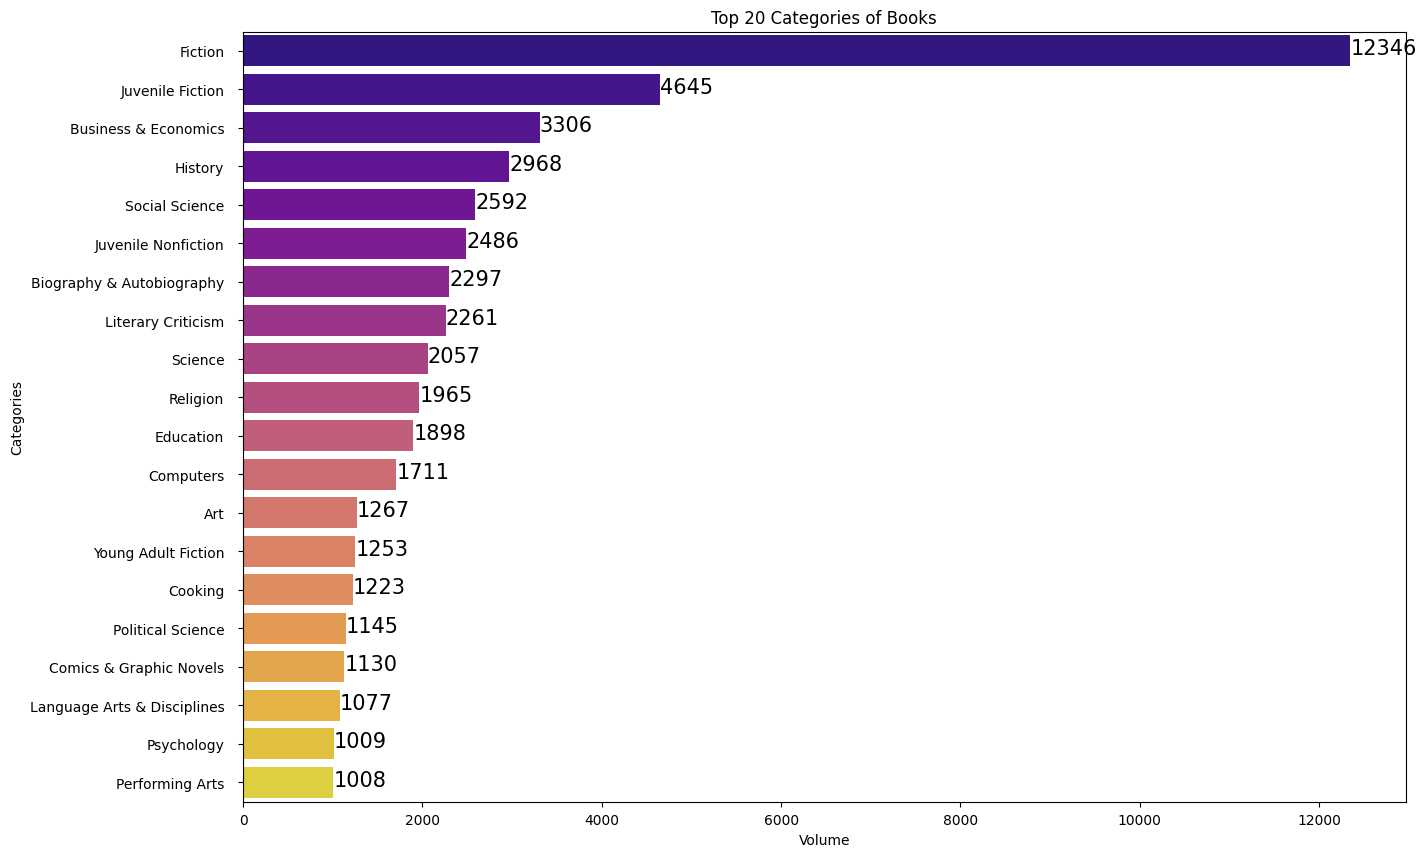

In [35]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x = categories_df.head(20)['Volume'], y = categories_df.head(20).index, palette='plasma')

ax.set_xlabel("Volume")
ax.set_title('Top 20 Categories of Books')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round(i.get_width())),fontsize = 15, color ='black')
plt.show()

### Publishers

In [17]:
#Top fifteen Publishers
# to remove missing as category
publisher_table=cleaned_df[cleaned_df['volumeInfo.publisher']!='Missing']
top_15_publisher = publisher_table.groupby('volumeInfo.publisher')['volumeInfo.title'].count().reset_index().sort_values('volumeInfo.title', ascending=False).head(15).set_index('volumeInfo.publisher')
top_15_publisher.head(15)

,volumeInfo.title
volumeInfo.publisher,
Routledge,2324
Hachette UK,1844
Simon and Schuster,1700
Penguin,1599
National Geographic Books,1274
John Wiley & Sons,1183
Springer,1183
Createspace Independent Publishing Platform,978
Random House,974


**Top fifteen Publishers-Bar Chart**
<br/>
Observation: Routledge published the most, with 2,324 different books based on our data. Subsequently, Hachette UK and Simon and Schuster ranked second and third with 1,844 and 1,700 books published respectively.

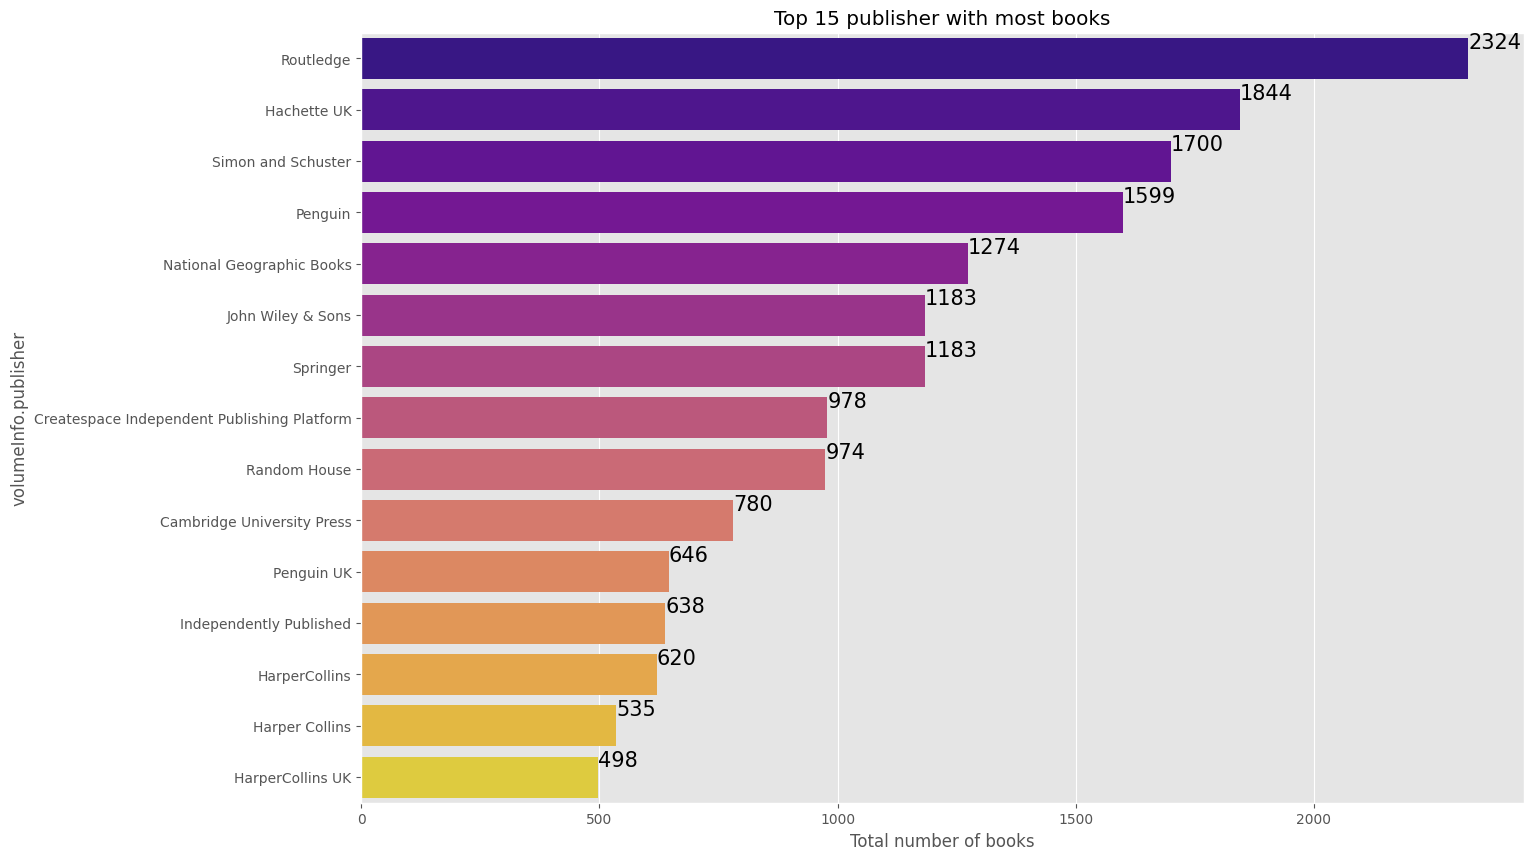

In [21]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x = top_15_publisher['volumeInfo.title'], y = top_15_publisher.index, palette='plasma')

ax.set_title("Top 15 publisher with most books")
ax.set_xlabel("Total number of books")
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

### Authors

In [22]:
#Top 15 authors
# to remove missing as category
author_table=cleaned_df[cleaned_df['volumeInfo.authors']!='Missing']
author_table

# Get top 15 authors
top_fifteen_authors = author_table.groupby('volumeInfo.authors')['volumeInfo.title'].count().reset_index().sort_values('volumeInfo.title', ascending=False).head(15).set_index('volumeInfo.authors')
top_fifteen_authors.head(15)

,volumeInfo.title
volumeInfo.authors,
DK,217
Blake Pierce,89
Library of Congress Copyright Office,81
Library of Congress,81
Jupiter Kids,78
Isaac Asimov,65
Betty Neels,65
Baby Professor,54
British Museum Department of Printed Books,50


**Top fifteen Authors with most books-Bar Chart**
<br/>
Observation: Based on our data, DK has the highest books written, which is 217, followed by Blake Pierce, Library of Congress
Copyright Office and Jupiter Kids. 'Missing' category is removed prior to creating this chart to present accurate data.

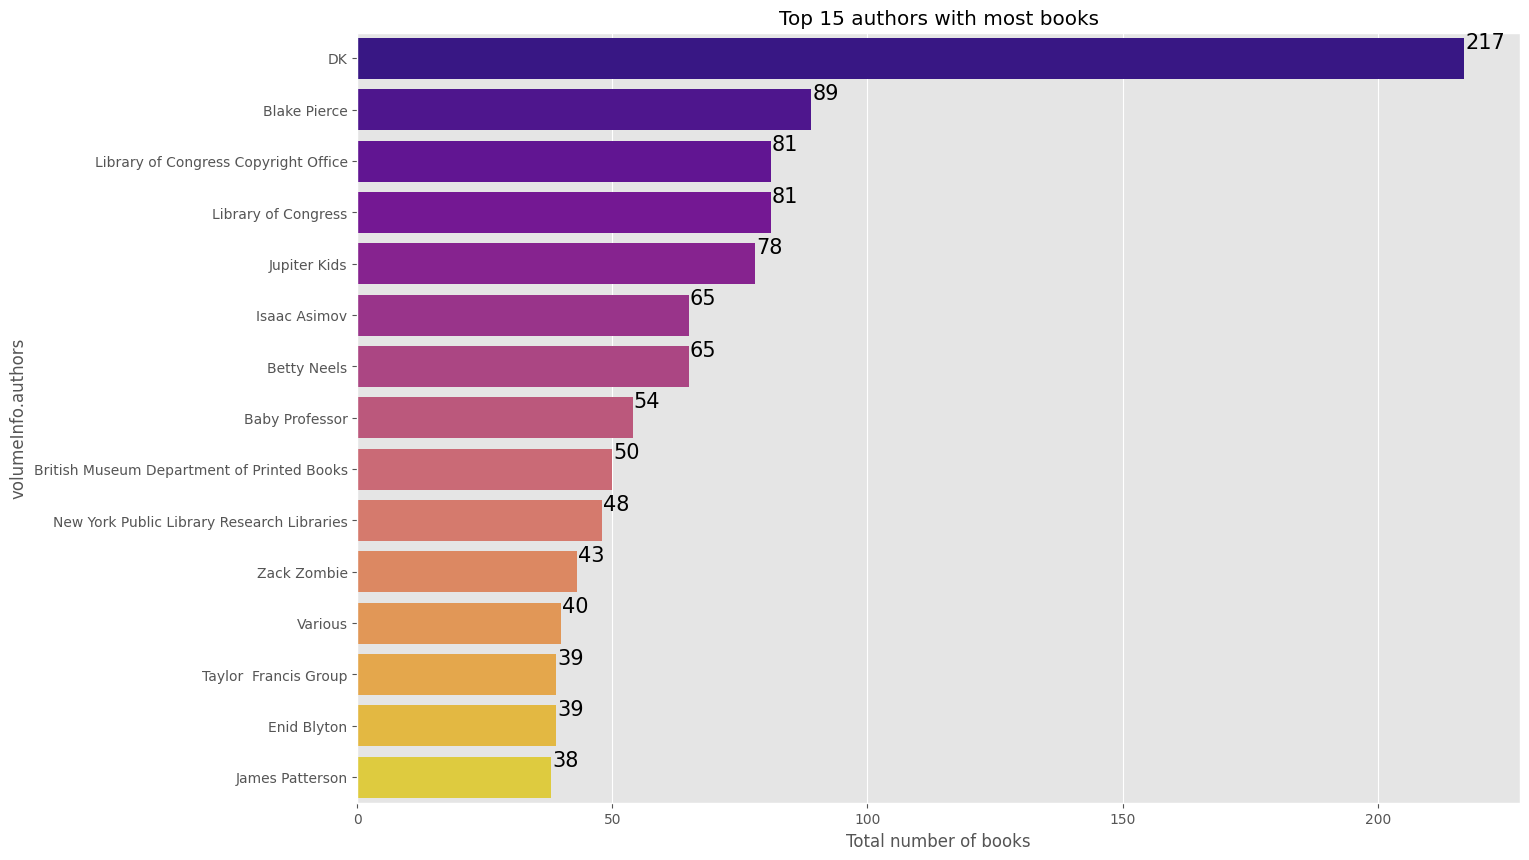

In [24]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x = top_fifteen_authors['volumeInfo.title'], y = top_fifteen_authors.index, palette='plasma')

ax.set_title("Top 15 authors with most books")
ax.set_xlabel("Total number of books")
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

### Book Published Year

From this plot it is observed that most of the publication years is 2000. There are some books from the year 1700. 

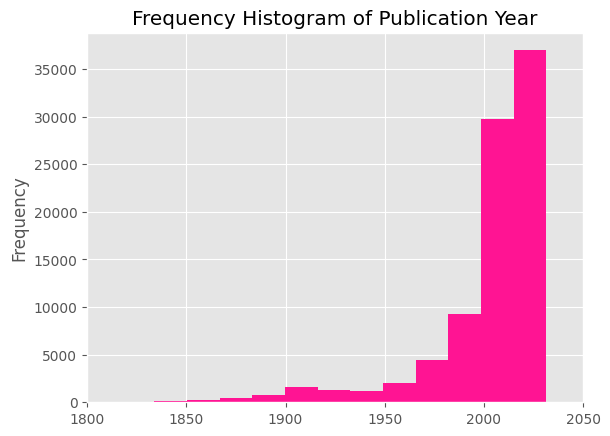

In [25]:
#Histogram of published year
x = cleaned_df['volumeInfo.publishedYear']
plt.style.use('ggplot')
plt.hist(x, bins=50, color ='deeppink')
plt.gca().set(title='Frequency Histogram of Publication Year', ylabel='Frequency')
plt.xlim(xmin=1800, xmax = 2050)
plt.show()

### Book Page Count

The minimum page count is 1 and the maximum page count is 99998. From this plot it can be seen that most of the books have
page count of 250 to 500 pages. 

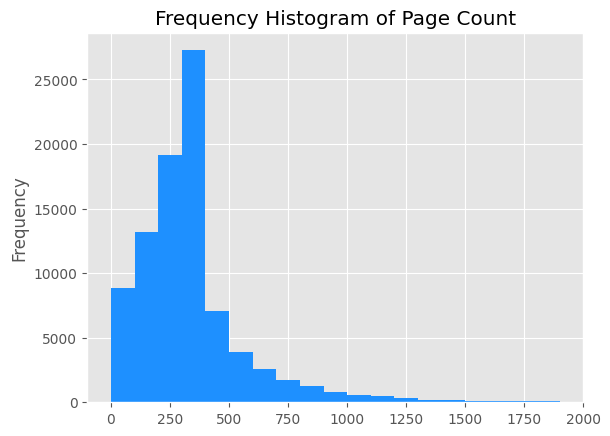

In [26]:
#Histogram of pagecount

x = cleaned_df['volumeInfo.pageCount']
plt.style.use('ggplot')
plt.hist(x, bins=1000, color ='dodgerblue')
plt.gca().set(title='Frequency Histogram of Page Count', ylabel='Frequency')
plt.xlim(xmin=-100, xmax = 2000)
plt.show()

### Book Viewability

**The View Status of all the books**
<br/>
Observation: The pie chart shows the percentages of the books that can be viewed. Majority of the books cannot be viewed (labelled 'NONE') while only 2% are available as full public domain. The books in public domain can legally be used or
referenced without permission. Thus all books under public domain have full viewing access available online.

Text(0.5, 1.0, 'View Status')

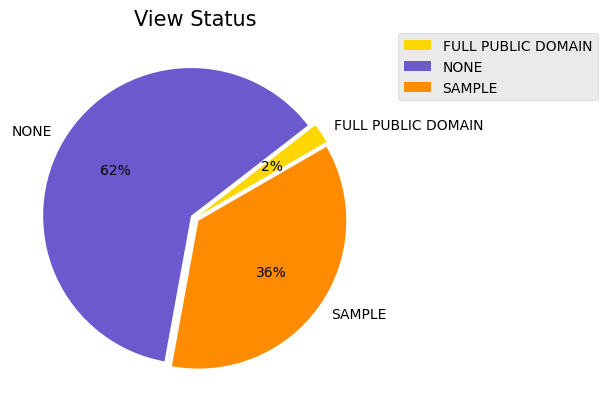

In [13]:
view_status = cleaned_df['accessInfo.accessViewStatus'].value_counts()
view_status_df = view_status.reset_index() 
view_status_df.columns = "Status", ""

colors = ['gold', 'slateblue', 'darkorange']
explode = (0.03, 0.03, 0.03)
view_status_df.groupby(['Status']).sum().plot(kind='pie', y="", autopct='%1.0f%%', colors=colors, explode=explode,
                                             startangle=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('View Status', fontsize = 15)

**The Viewability of Samples**
<br/>
Observation: The pie chart showcases the viewability of the books previously categorized as 'Samples'. Of these samples, most of the books have a small segment available for viewing while 1% are available in full.

Text(0.5, 1.0, 'Viewability of Samples')

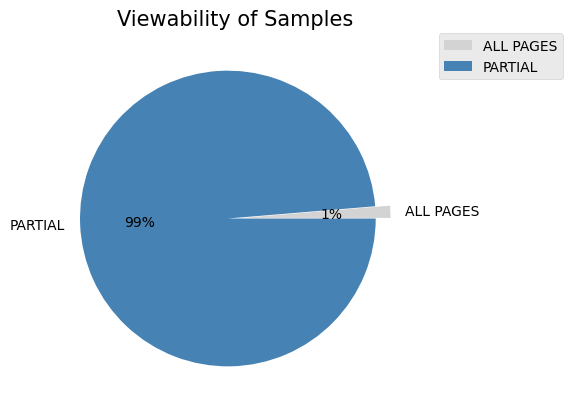

In [14]:
sample_only_df = cleaned_df[['accessInfo.accessViewStatus','accessInfo.viewability']]
sample_only_df = sample_only_df.set_index('accessInfo.accessViewStatus')
sample_only_df = sample_only_df.loc['SAMPLE']

viewability = sample_only_df['accessInfo.viewability'].value_counts()
viewability_df = viewability.reset_index() 
viewability_df.columns = "Viewability", ""
viewability_df = viewability_df.set_index('Viewability')

colors = ['lightgray', 'steelblue']
explode = (0.05, 0.05)
viewability_df.groupby(['Viewability']).sum().plot(kind='pie', y='', autopct='%1.0f%%', colors=colors,explode=explode)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Viewability of Samples', fontsize = 15)

### Book Accessibility

In [15]:
#ePub and PDF access [Both, ePub only, PDF only, None]

pd.options.mode.chained_assignment = None 
epub_pdf_df = cleaned_df[['accessInfo.epub.isAvailable','accessInfo.pdf.isAvailable']]
epub_pdf_df.columns = "accessInfo.epub.isAvailable", "accessInfo.pdf.isAvailable"
epub_pdf_df['Availability']=0

def avail(epub_pdf_df):
    if (epub_pdf_df ['accessInfo.epub.isAvailable'] == True) & (epub_pdf_df ['accessInfo.pdf.isAvailable'] == True):
        return 'Both'
    elif (epub_pdf_df ['accessInfo.epub.isAvailable'] == True) & (epub_pdf_df ['accessInfo.pdf.isAvailable'] == False):
        return 'ePub only'
    elif (epub_pdf_df ['accessInfo.epub.isAvailable'] == False) & (epub_pdf_df ['accessInfo.pdf.isAvailable'] == True):
        return 'PDF only'
    elif (epub_pdf_df ['accessInfo.epub.isAvailable'] == False) & (epub_pdf_df ['accessInfo.pdf.isAvailable'] == False):
        return 'None'
    
epub_pdf_df['Availability'] = epub_pdf_df.apply(avail, axis = 1)
availability = epub_pdf_df['Availability'].value_counts()
availability_df = availability.reset_index()
availability_df.columns = "Type", "Amount"
availability_df

,Type,Amount
0,None,50333
1,Both,14927
2,PDF only,14419
3,ePub only,8642


Observation: Most of the books have neither formats available. 

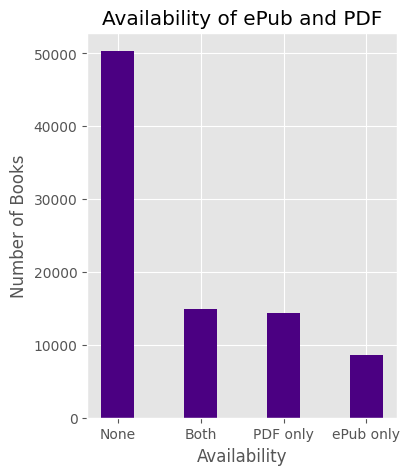

In [16]:
fig = plt.figure(figsize = (4,5))

ax = plt.bar(availability_df['Type'], availability_df['Amount'], color ='indigo',width = 0.4)
plt.xlabel("Availability")
plt.ylabel("Number of Books")
plt.title("Availability of ePub and PDF")
plt.show()

### Price

### Ebook

It is observed that the Ebook availability mostly is false. This means that the books are not available as ebook. 

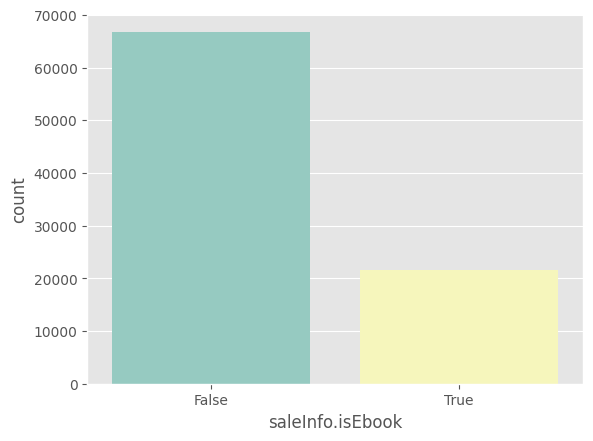

In [27]:
# Count plot of ebook availability
sns.countplot(x ='saleInfo.isEbook', data = cleaned_df, palette = "Set3")
plt.show()

### Rating

The graphs below showcased the top 15 books with the highest ratings count. From the graphs, it is noticed that 'Saga' has the highest rating count among all the books, with the rating count at least 2.5x more than the other books. There are no significance difference in ratings count if compared between the rest of the books.

In [37]:
# Top 15 Most Rating Count Books
top_fifteen_books = cleaned_df.copy()
top_fifteen_books.sort_values(by=['volumeInfo.ratingsCount', 'volumeInfo.averageRating'], ascending = [False, False], inplace = True)
display(top_fifteen_books[['volumeInfo.title', 'volumeInfo.ratingsCount', 'volumeInfo.averageRating']].head(15))

,volumeInfo.title,volumeInfo.ratingsCount,volumeInfo.averageRating
59481,Saga,14129,4.5
3581,Heaven is for Real,5620,4.0
14053,The Alchemist,4897,3.0
3917,The Giving Tree,4816,4.0
3856,Where the Wild Things are,4611,4.0
27980,Unbroken,4574,4.5
23245,Blue Like Jazz,4561,3.5
3286,Into the Wild,4485,3.5
2823,The Tipping Point,4247,3.5
14618,Outliers,4212,3.5


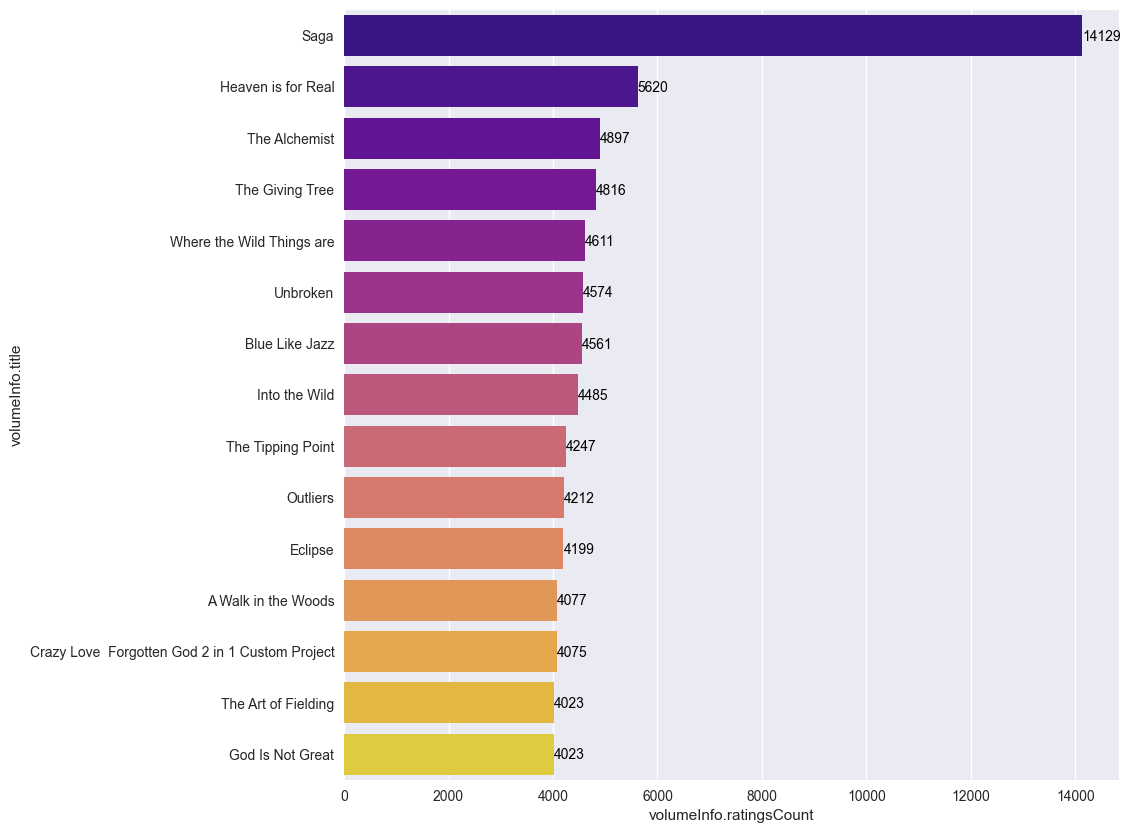

In [38]:
plt.style.use("seaborn-v0_8")
plt.figure(figsize=(10, 10))

data = top_fifteen_books.head(15)
gr = sns.barplot(x="volumeInfo.ratingsCount", y="volumeInfo.title", data=data, palette="plasma")

for i in gr.patches:
    gr.text(i.get_width() + .05, i.get_y() + 0.5, str(round(i.get_width())), fontsize = 10, color = 'k')
plt.show()

**Top 15 Rated Books-Bar Chart**
<br/>
Observation: Out of the top 15 highest ratings count books, it is observed that 'Unbroken' and 'Saga' have the highest ratings, i.e. 4.5, followed by 'The Immortal Life of Henrietta Lacks','Heaven is for Real','Where the Wild Things are','The Giving Tree' and 'Crazy Love/Forgotten God 2 in 1 Custom Project' that score 4.0. Noted that none of the books above attained 5.0 ratings. This is because the number of ratings is taken into consideration. Thus, books with 5.0 ratings but with only a few number of ratings will not be shown here.

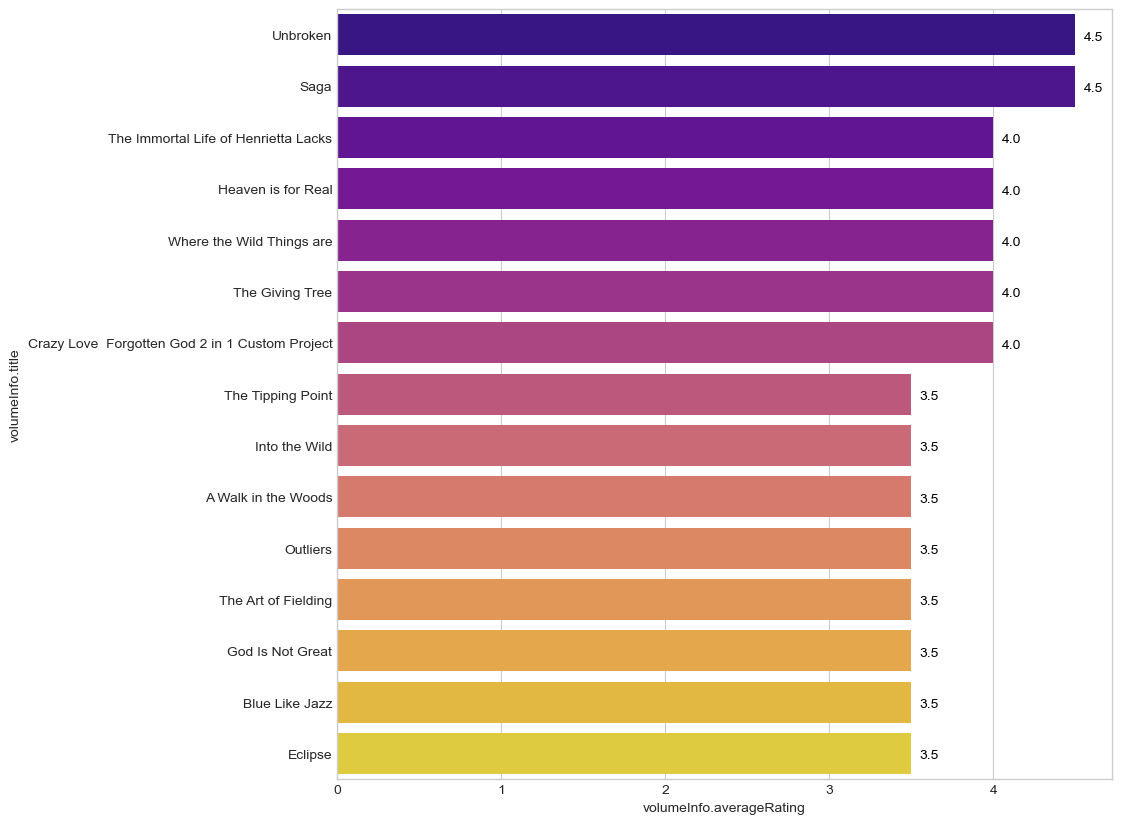

In [46]:
plt.style.use("seaborn-v0_8")
plt.figure(figsize=(10, 10))

data = top_fifteen_books.head(15)
gr = sns.barplot(x="volumeInfo.averageRating", y="volumeInfo.title", data=data, palette="plasma")

for i in gr.patches:
    gr.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 10, color = 'k')
plt.show()

From the graphs below, it is shown that there is no significant relationship between ratings count and the average rating of the book. 

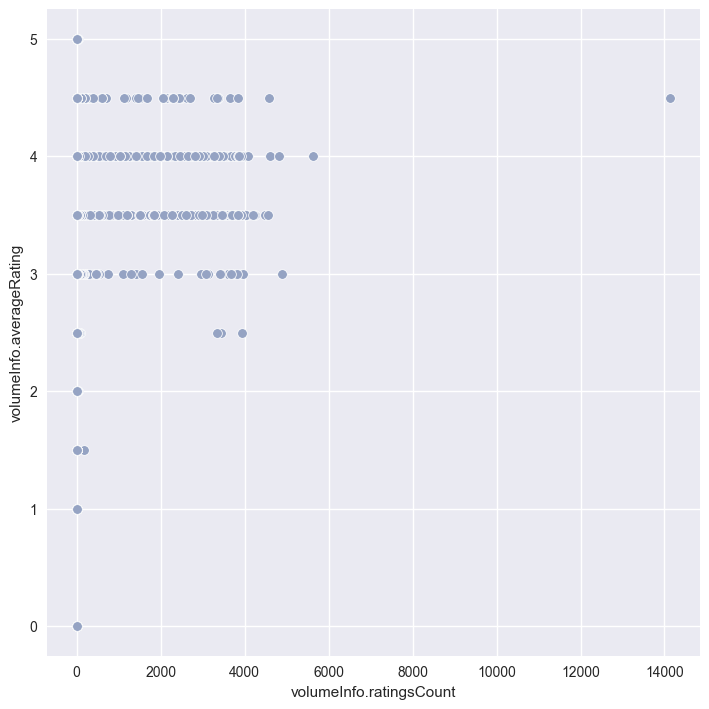

In [30]:
#Find relationship between average rating and rating count
#Most of the books were rated 4.0, followed by 3.5.
ax = sns.relplot(data=cleaned_df,
                 x="volumeInfo.ratingsCount",
                 y="volumeInfo.averageRating",
                 color = '#95a3c3',
                 sizes=(400, 600), 
                 height=7, 
                 marker='o')

Overall, most books sit at ratings 3.0 and above, and a huge portion of the books are with rating 4.0. 

Text(0.5, 0, 'Average rating')

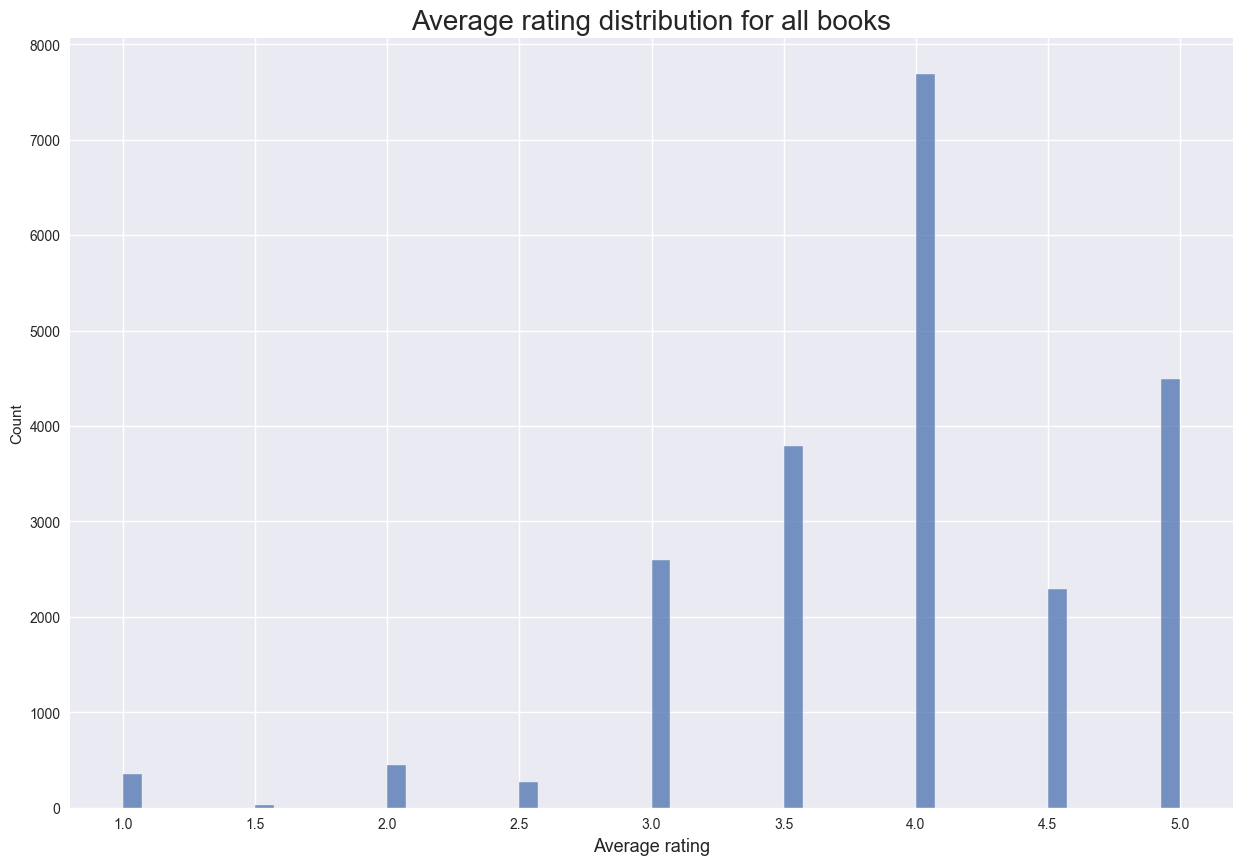

In [35]:
# Distribution of average_rating
cleaned_df['volumeInfo.averageRating'] = cleaned_df['volumeInfo.averageRating'].astype(float)
averageRating_df = cleaned_df[cleaned_df['volumeInfo.averageRating'] > 0]

fig, ax = plt.subplots(figsize=[15,10])

sns.histplot(averageRating_df['volumeInfo.averageRating'],ax=ax)
ax.set_title('Average rating distribution for all books',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13)

Based on the pie chart below, most books are suitable for all ages.

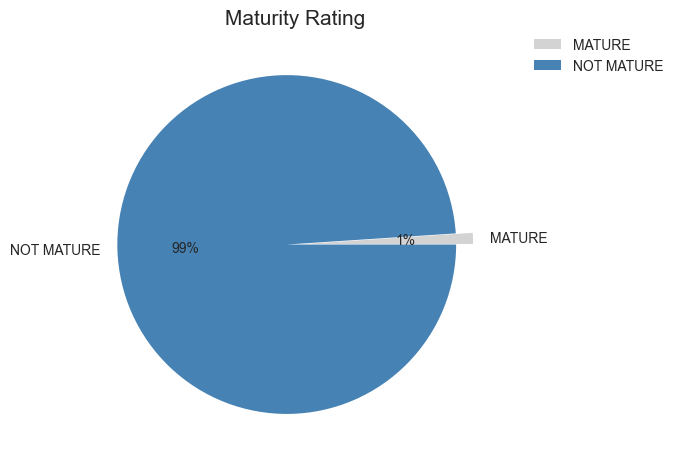

In [48]:
maturity_rate_df = cleaned_df[['volumeInfo.maturityRating']].value_counts()
maturity_rate_df = maturity_rate_df.reset_index()
maturity_rate_df.columns = "Maturity_Rating", ""
maturity_rate_df = maturity_rate_df.groupby(['Maturity_Rating']).sum()

colors = ['lightgray', 'steelblue']
explode = (0.05, 0.05)
maturity_rate_df.plot(kind='pie', y='', autopct='%1.0f%%', colors=colors,explode=explode)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Maturity Rating', fontsize = 15)
  
# displaying chart
plt.show()